In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 39.48 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
import zipfile
import io

In [3]:
zip_path = "/kaggle/working/pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip"
zip_ref = zipfile.ZipFile(zip_path)
zip_ref.extractall("pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign")
zip_ref.close()

In [4]:
train_path = "/kaggle/working/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt"
valid_path = "/kaggle/working/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt"
test_path = "/kaggle/working/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt"

In [5]:
import pandas as pd

def read_data(data_path):
    datas = open(data_path, 'r')
    datas = datas.readlines()
    datas = list(filter(lambda data: data!='\n', datas))

    data_title_index = []
    data_processed = []
    line_number = 0
    total_lines_index = 0

    for index, data in enumerate(datas):
        if(not('\t' in data)):
            data_title_index.append(index)
    data_title_index.append(len(datas))

    for index, data in enumerate(datas):
        if index == data_title_index[total_lines_index]:
            total_lines_index+=1
            line_number = 0
            continue

        target = data.split('\t')[0]
        text = data.split('\t')[1].split('\n')[0]
        total_lines = data_title_index[total_lines_index] - data_title_index[total_lines_index-1] - 1
        data_processed.append({
            'target':target,
            'text': text,
            'line_number': line_number,
            'total_lines': total_lines
        })

        line_number+=1

    return pd.DataFrame(data_processed)

In [6]:
train_data_df = read_data(train_path)
valid_data_df = read_data(valid_path)
test_data_df = read_data(test_path)

In [7]:
pd.DataFrame(train_data_df)

target                                               text  \
0         OBJECTIVE  To investigate the efficacy of @ weeks of dail...   
1           METHODS  A total of @ patients with primary knee OA wer...   
2           METHODS  Outcome measures included pain reduction and i...   
3           METHODS  Pain was assessed using the visual analog pain...   
4           METHODS  Secondary outcome measures included the Wester...   
...             ...                                                ...   
180035      RESULTS  For the absolute change in percent atheroma vo...   
180036      RESULTS  For PAV , a significantly greater percentage o...   
180037      RESULTS  Both strategies had acceptable side effect pro...   
180038  CONCLUSIONS  Compared with standard statin monotherapy , th...   
180039  CONCLUSIONS  ( Plaque Regression With Cholesterol Absorptio...   

        line_number  total_lines  
0                 0           12  
1                 1           12  
2                 2           12  
3                 3           12  
4                 4           12  
...             ...          ...  
180035            7           12  
180036            8           12  
180037            9           12  
180038           10           12  
180039           11           12  

[180040 rows x 4 columns]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

In [9]:
train_data = pd.DataFrame(train_data_df)
train_text = train_data['text'].to_list()
train_label = train_data['target'].to_list()

valid_data = pd.DataFrame(valid_data_df)
valid_text = valid_data['text'].to_list()
valid_label = valid_data['target'].to_list()

test_data = pd.DataFrame(test_data_df)
test_text = test_data['text'].to_list()
test_label = test_data['target'].to_list()

In [10]:
encoder = LabelEncoder()

train_label_transformed = encoder.fit_transform(np.array(train_label).reshape(-1,1))
valid_label_transformed = encoder.transform(np.array(valid_label).reshape(-1,1))
test_label_transformed = encoder.transform(np.array(test_label).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Model 0 (base Model)
Datasets are trained using Scikitlearn's model: Multinomial Naive Bayes. The result is set to be the baseline to beat.

In [11]:
model_0 = Pipeline([
    ('tf_idf', TfidfVectorizer()),
    ('multi_nb', MultinomialNB())
])

model_0.fit(train_text, train_label_transformed)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('multi_nb', MultinomialNB())])

In [12]:
pred = model_0.predict(valid_text)

In [13]:
def get_score(y_true, y_pred):
  f1 = f1_score(y_true, y_pred, average='weighted')
  accuracy = accuracy_score(y_true, y_pred)

  print(f"f1 score: {f1}")
  print(f"accuracy score: {accuracy}")

  return

In [14]:
get_score(valid_label_transformed, pred)

f1 score: 0.6989250353450294
accuracy score: 0.7218323844829869


In [15]:
model_0.save("/kaggle/working/Model_0.keras")

AttributeError: 'Pipeline' object has no attribute 'save'

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

## Model 1: Convolutional Neural Network 1D
First, the input text is **word vectorized**. Embedding layers create tensors of size **(None, LEN_OF_TEXT, EMBEDDING_DIM)**. Using 1D-CNN, these tensors can be further processed to find similarity between datas, resulting in **(None, LEN_OF_TEXT, NUM_FILTERS)** tensors. 

Training this model leads to a **better result** compared to the baseline model.

Average word length: len    26.338269
dtype: float64


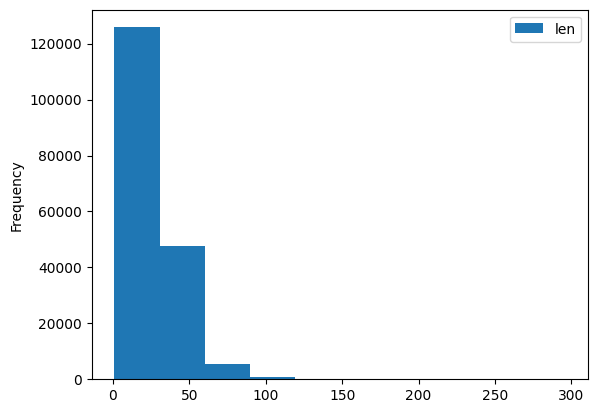

In [17]:
train_len_text = pd.DataFrame({'len': list(map(lambda data: len(data.split(' ')), train_text))})
train_len_text.plot.hist();

print(f"Average word length: {train_len_text.sum()/len(train_len_text)}")

In [18]:
#------ model_1: CNN1D
num_words=20000
len_text=27

text_vectorizer = layers.TextVectorization(max_tokens=num_words, output_sequence_length=len_text)
text_vectorizer.adapt(train_text)
embedding = layers.Embedding(input_dim=num_words, output_dim=64, input_length=len_text)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
ohe = OneHotEncoder().fit(np.array(train_label).reshape(-1,1))

train_label_ohe = ohe.transform(np.array(train_label).reshape(-1,1)).toarray()
valid_label_ohe = ohe.transform(np.array(valid_label).reshape(-1,1)).toarray()
test_label_ohe = ohe.transform(np.array(test_label).reshape(-1,1)).toarray()

In [20]:
train_data = tf.data.Dataset.from_tensor_slices((train_text, train_label_ohe))
valid_data = tf.data.Dataset.from_tensor_slices((valid_text, valid_label_ohe))
test_data = tf.data.Dataset.from_tensor_slices((test_text, test_label_ohe))

In [21]:
batch_size=32

train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data = valid_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [22]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, padding='same')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)

model_1 = keras.Model(inputs, outputs)
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 27)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 27, 64)              │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 27, 32)              │          10,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,290,437 (4.92 MB)

 Trainable params: 1,290,437 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
train_data
print(type(train_data))

model_1.compile(loss=keras.losses.CategoricalCrossentropy(),
           optimizer=keras.optimizers.Adam(),
           metrics=["accuracy"])


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [24]:
steps_per_epoch = int(tf.data.experimental.cardinality(train_data).numpy())  # Ensure int
validation_steps = int(0.2 * tf.data.experimental.cardinality(valid_data).numpy())  # Ensure int

history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=steps_per_epoch,  # ✅ Ensure it's an int
                        validation_data=valid_data,
                        validation_steps=validation_steps,  # ✅ Ensure it's an int
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=3)])


Epoch 1/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.7157 - loss: 0.7338 - val_accuracy: 0.7839 - val_loss: 0.5704
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7855 - val_loss: 0.5631
Epoch 3/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.8175 - loss: 0.5073 - val_accuracy: 0.7961 - val_loss: 0.5610
Epoch 4/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7855 - val_loss: 0.5714
Epoch 5/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.8382 - loss: 0.4552 - val_accuracy: 0.7884 - val_loss: 0.5968
Epoch 6/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
  22/5627 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.8206 - loss: 0.4644

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


5627/5627 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.8558 - loss: 0.4142 - val_accuracy: 0.7834 - val_loss: 0.6145


In [25]:
pred = model_1.predict(test_data)
score_1 = model_1.evaluate(test_data)

pred = tf.argmax(pred, axis=1)
get_score(test_label_transformed, pred)

942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7857 - loss: 0.5827
f1 score: 0.7792478951284761
accuracy score: 0.782312925170068


In [26]:
model_1.save("/kaggle/working/Model_1.keras")

## Model 2: Feature Extraction
Model is built using tensorflow hub's trained model **(Universal Sentence Encoder)**. The output tensors are then followed with several Fully Connected Layers.

Training the model results in accuracy **better than the baseline model**, but performs **worse than Model 1**.

In [27]:
#--------- model_2: using feature extraction model from tfhub (USE)
USE = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")

In [28]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Create a wrapper layer for the Universal Sentence Encoder
class USELayer(layers.Layer):
    def __init__(self, use_url, **kwargs):
        super(USELayer, self).__init__(**kwargs)
        self.use_url = use_url
        self.use_model = hub.load(use_url)
        
    def call(self, inputs):
        return self.use_model(tf.squeeze(inputs, axis=1))
    
    def get_config(self):
        config = super(USELayer, self).get_config()
        config.update({"use_url": self.use_url})
        return config

# URL to the Universal Sentence Encoder model
use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Model architecture with the wrapper layer
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = USELayer(use_url)(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(5, activation='softmax')(x)

model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ use_layer (USELayer)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,077 (137.02 KB)

 Trainable params: 35,077 (137.02 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
train_data = train_data.map(lambda x, y: (tf.reshape(x, (-1, 1)), y))
valid_data = valid_data.map(lambda x, y: (tf.reshape(x, (-1, 1)), y))


for x_batch, y_batch in train_data.take(1):
    print("Input batch shape:", x_batch.shape, "dtype:", x_batch.dtype)
    print("Target batch shape:", y_batch.shape, "dtype:", y_batch.dtype)


train_data = train_data.map(lambda x, y: (x, tf.cast(y, tf.float32)))
valid_data = valid_data.map(lambda x, y: (x, tf.cast(y, tf.float32)))
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"



Input batch shape: (32, 1) dtype: <dtype: 'string'>
Target batch shape: (32, 5) dtype: <dtype: 'float64'>


In [30]:
model_2.compile(loss=keras.losses.CategoricalCrossentropy(),
           optimizer=keras.optimizers.Adam(),
           metrics=["accuracy"])

steps_per_epoch = int(tf.data.experimental.cardinality(train_data).numpy())  # Ensure int
validation_steps = int(0.2 * steps_per_epoch)  # Convert float to int  # Ensure int


with tf.device('/CPU:0'):
    history_2 = model_2.fit(train_data, epochs=10, steps_per_epoch=steps_per_epoch)


Epoch 1/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.6809 - loss: 0.8110
Epoch 2/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
  22/5627 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.7445 - loss: 0.7411

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5627/5627 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.7529 - loss: 0.6457
Epoch 4/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.7656 - loss: 0.6134
Epoch 6/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.7728 - loss: 0.5938
Epoch 8/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.7795 - loss: 0.5802
Epoch 10/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [31]:
pred_2 = model_2.predict(test_data)
score_2 = model_2.evaluate(test_data)

pred_2 = tf.argmax(pred_2, axis=1)
get_score(test_label_transformed, pred_2)

942/942 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7610 - loss: 0.6292
f1 score: 0.7585597913820344
accuracy score: 0.7627343620374979


In [32]:
model_2.save("/kaggle/working/Model_2.keras")

## Model 3: Another 1D-CNN
This model is built under the same logic of Model 1. However, this time, the input text is vectorized based on each character **(character vectorized)**. 

The model performs **as good as Model 1**.

Average char length: len    149.366257
dtype: float64


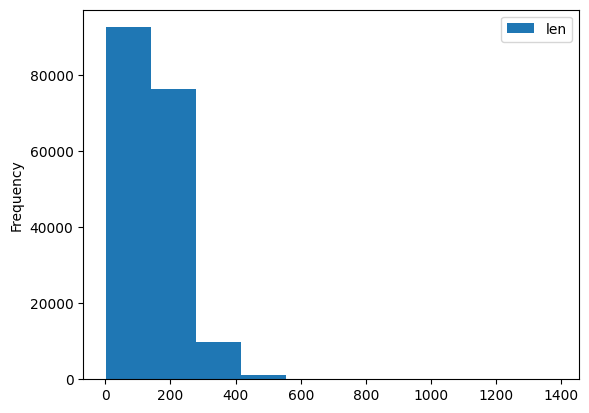

In [33]:
train_len_text = pd.DataFrame({'len': list(map(lambda data: len(data), train_text))})
train_len_text.plot.hist();

print(f"Average char length: {train_len_text.sum()/len(train_len_text)}")

In [34]:
char_vectorizer = layers.TextVectorization(max_tokens=30, split='character', output_sequence_length=150)
char_vectorizer.adapt(train_text)

In [35]:
char_embedding = layers.Embedding(input_dim=30, output_dim=128, input_length=200)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embedding(x)
x = layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D()(x)
x = layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D()(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='sigmoid')(x)

model_3 = keras.Model(inputs, outputs)
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 150)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 150, 128)            │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 150, 32)             │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 150, 32)             │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 75, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 75, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 75, 64)              │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 37, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,677 (237.02 KB)

 Trainable params: 60,677 (237.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3.compile(loss=keras.losses.CategoricalCrossentropy(),
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])


steps_per_epoch = int(tf.data.experimental.cardinality(train_data).numpy())  # Ensure int
validation_steps = int(0.2 * tf.data.experimental.cardinality(valid_data).numpy())  # Ensure int

history_3 = model_3.fit(train_data,
                       epochs=10, 
                       validation_data=valid_data,
                       validation_steps=validation_steps,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=3)])

Epoch 1/10
1542/5627 ━━━━━━━━━━━━━━━━━━━━ 1:43 25ms/step - accuracy: 0.4787 - loss: 1.2030

In [ ]:
pred_3 = model_3.predict(test_data)
score_3 = model_3.evaluate(test_data)

pred_3 = tf.argmax(pred_3, axis=1)
get_score(test_label_transformed, pred_3) 

In [ ]:
model_3.save("/kaggle/working/Model_3.keras")

## Model 4: Multimodal Model
Model are built by **concatenating chararcter vectorization technique** and **trained Universal Sentence Encoder model**. There's a slight difference on the character vectorization model, which uses BiDirectional LSTM layers (rather than 1D-CNN). The concatenated result of these 2 models are then connected to dropout layers to avoid overfitting.

This model performs **slightly better than 1D-CNN models**.

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Universal Sentence Encoder (USE)
USE = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)

# Input layer
inputs_token = layers.Input(shape=(), dtype=tf.string)

# Wrap USE in a Lambda layer with explicit output shape
x_token = layers.Lambda(lambda x: USE(x), output_shape=(512,))(inputs_token)  # USE outputs a 512-dimensional vector

# Dense layer
outputs_token = layers.Dense(128, activation='relu')(x_token)

# Model
model_4_token = keras.Model(inputs_token, outputs_token)

# Summary
model_4_token.summary()


In [ ]:
char_vectorizer = layers.TextVectorization(max_tokens=80, output_sequence_length=300, split='character')
char_vectorizer.adapt(train_text)

char_embedding = layers.Embedding(input_dim=80, output_dim=32, input_length=300, mask_zero=True)

In [ ]:
inputs_char = layers.Input(shape=(1,), dtype=tf.string)
x_char = char_vectorizer(inputs_char)
x_char = char_embedding(x_char)
outputs_char = layers.Bidirectional(layers.LSTM(32))(x_char)
model_4_char = keras.Model(inputs_char, outputs_char)

In [ ]:
model_4_concat_layer = layers.Concatenate()([model_4_token.output, model_4_char.output])
x = layers.Dropout(0.5)(model_4_concat_layer)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)

model_4 = keras.Model([model_4_token.input, model_4_char.input], outputs)

In [ ]:
from keras.utils import plot_model
plot_model(model_4)

In [ ]:
train_data_4 = tf.data.Dataset.from_tensor_slices(((train_text, train_text), train_label_ohe))
valid_data_4 = tf.data.Dataset.from_tensor_slices(((valid_text, valid_text), valid_label_ohe))
test_data_4 = tf.data.Dataset.from_tensor_slices(((test_text, test_text), test_label_ohe))

train_data_4 = train_data_4.batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data_4 = valid_data_4.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_data_4 = test_data_4.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Compile the model
model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Ensure cardinality is calculated from the correct dataset variables
steps_per_epoch = int(tf.data.experimental.cardinality(train_data_4).numpy())
validation_steps = int(0.2 * tf.data.experimental.cardinality(valid_data_4).numpy())

# Train the model with early stopping
history_4 = model_4.fit(
    train_data_4,
    epochs=10,
    validation_data=valid_data_4,
    validation_steps=validation_steps,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=3)]
)


In [ ]:
pred_4 = model_4.predict(test_data_4)
score_4 = model_4.evaluate(test_data_4)

pred_4 = tf.argmax(pred_4, axis=1)
get_score(test_label_transformed, pred_4) 

In [ ]:
model_4.save("/kaggle/working/Model_4.keras")

## Model 5: Tribrid Model
The tribrid model has the similar idea with Model 4, however, this time, we utilizes the position of the sentence in each section.

This model is the **best model** we've built so far with over **85% of accurcacy**.

In [ ]:
def split_dataframe(data):
    data_target = np.array(data['target'])
    data_text = np.array(data['text'])
    data_line_number = np.array(data['line_number'])
    data_total_lines = np.array(data['total_lines'])

    return (data_target, data_text, data_line_number, data_total_lines)

In [ ]:
train_target, train_text, train_line_number, train_total_lines = split_dataframe(train_data_df)
valid_target, valid_text, valid_line_number, valid_total_lines = split_dataframe(valid_data_df)
test_target, test_text, test_line_number, test_total_lines = split_dataframe(test_data_df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def ohe_data(fit_data, transform_data):
    fit_data = fit_data.reshape(-1, 1)
    transform_data = transform_data.reshape(-1,1)

    ohe = OneHotEncoder().fit(fit_data)

    return np.array(ohe.transform(transform_data).toarray())

In [ ]:
train_target_transformed = ohe_data(train_target, train_target)
valid_target_transformed = ohe_data(train_target, valid_target)
test_target_transformed = ohe_data(train_target, test_target)

In [ ]:
max_char = 72
output_sequence_length_char = 300

char_vectorizer = layers.TextVectorization(max_tokens=max_char,
                                           output_sequence_length=output_sequence_length_char,
                                           split='character')

char_vectorizer.adapt(['0123456789abcdefghijklmnopqrstuvwxyz\!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '])

char_embedding = layers.Embedding(input_dim=max_char,
                                  output_dim=25,
                                  input_length=output_sequence_length_char,
                                  mask_zero=True)

In [ ]:
inputs_char = layers.Input(shape=(1,), dtype=tf.string)
x_char = char_vectorizer(inputs_char)
x_char = char_embedding(x_char)
outputs_char = layers.Bidirectional(layers.LSTM(24))(x_char)

model_char_embedding = keras.Model(inputs_char, outputs_char)

In [ ]:
tf.keras.utils.plot_model(model_char_embedding, to_file="embedding_model.png", show_shapes=True)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Create a custom layer to wrap the USE
class USELayer(layers.Layer):
    def __init__(self, use_url, **kwargs):
        super(USELayer, self).__init__(**kwargs)
        self.use_url = use_url
        self.use_model = hub.load(use_url)
        
    def call(self, inputs):
        # Use tf.cond for conditional logic that works in graph mode
        def squeeze_input():
            return tf.squeeze(inputs, axis=1)
            
        def keep_input():
            return inputs
        
        # Get rank without using Python conditionals
        input_rank = tf.rank(inputs)
        inputs_processed = tf.cond(
            tf.greater(input_rank, 1),
            squeeze_input,
            keep_input
        )
        
        return self.use_model(inputs_processed)
    
    def compute_output_shape(self, input_shape):
        # USE outputs 512-dimensional embeddings
        return (input_shape[0], 512)
    
    def get_config(self):
        config = super(USELayer, self).get_config()
        config.update({"use_url": self.use_url})
        return config

# Define the model
use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
inputs_token = layers.Input(shape=(1,), dtype=tf.string)
x_token = USELayer(use_url)(inputs_token)
outputs_token = layers.Dense(256, activation='relu')(x_token)

# Create the model
model_token_embedding= tf.keras.Model(inputs=inputs_token, outputs=outputs_token)

In [ ]:
text_concatenated_layer = layers.Concatenate()([model_char_embedding.output, model_token_embedding.output])

In [ ]:
train_data_df.line_number.value_counts()

In [ ]:
train_data_df.total_lines.value_counts()[:30]

In [ ]:
def preprocess_positional(datas, encoder):
    #preprocess using sklearn.preprocessing.OneHotEncoder
    datas = encoder.transform(datas)

    return np.array(datas.toarray())

In [ ]:
line_number_encoder = OneHotEncoder(max_categories=20).fit(train_line_number.reshape(-1,1))
train_line_number_transformed = preprocess_positional(train_line_number.reshape(-1,1), line_number_encoder)
valid_line_number_transformed = preprocess_positional(valid_line_number.reshape(-1,1), line_number_encoder)
test_line_number_transformed = preprocess_positional(test_line_number.reshape(-1,1), line_number_encoder)

total_lines_encoder = OneHotEncoder(max_categories=30).fit(train_total_lines.reshape(-1,1))
train_total_lines_transformed = preprocess_positional(train_total_lines.reshape(-1,1), total_lines_encoder)
valid_total_lines_transformed = preprocess_positional(valid_total_lines.reshape(-1,1), total_lines_encoder)
test_total_lines_transformed = preprocess_positional(test_total_lines.reshape(-1,1), total_lines_encoder)

In [ ]:
inputs_line_number = layers.Input(shape=(20,))
outputs_line_number = layers.Dense(64, activation='relu')(inputs_line_number)

model_line_number = keras.Model(inputs_line_number, outputs_line_number)

In [ ]:
inputs_total_lines = layers.Input(shape=(27,))
outputs_total_lines = layers.Dense(64, activation='relu')(inputs_total_lines)

model_total_lines = keras.Model(inputs_total_lines, outputs_total_lines)

In [ ]:
dropout_text_concatenated_layer = layers.Dense(512, activation='relu')(text_concatenated_layer)
dropout_text_concatenated_layer = layers.Dropout(0.5)(dropout_text_concatenated_layer)

model_concatenated_layer = layers.Concatenate()([model_line_number.output, model_total_lines.output, dropout_text_concatenated_layer])

In [ ]:
# x = layers.Dense(128, activation='relu')(model_concatenated_layer)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(model_concatenated_layer)

model_5 = keras.Model([model_line_number.input, model_total_lines.input, model_char_embedding.input, model_token_embedding.input], outputs)

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
def batch_data(char_data, text_data, line_number_data, total_lines_data, target, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((((line_number_data, total_lines_data, char_data, text_data), target)))
    dataset = dataset.shuffle(buffer_size=int(0.1 * len(char_data)))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

In [ ]:
train_dataset = batch_data(train_text, train_text, train_line_number_transformed, train_total_lines_transformed, train_target_transformed)
valid_dataset = batch_data(valid_text, valid_text, valid_line_number_transformed, valid_total_lines_transformed, valid_target_transformed)
test_dataset = batch_data(test_text, test_text, test_line_number_transformed, test_total_lines_transformed, test_target_transformed)

In [ ]:
model_5.compile(loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


steps_per_epoch = int(tf.data.experimental.cardinality(train_data).numpy())  # Ensure int
validation_steps = int(0.2 * tf.data.experimental.cardinality(valid_data).numpy())  # Ensure int

history = model_5.fit(train_dataset,
                    epochs=10,
                    steps_per_epoch= steps_per_epoch,
                    validation_data=validation_steps,
                    validation_steps=validation_steps,
                    callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)])

Don't shuffle the test data otherwise the get_score function wouldn't work as intended

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((((test_line_number_transformed, test_total_lines_transformed, test_text, test_text), test_target_transformed)))
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
pred_5 = model_5.predict(test_dataset)
score_5 = model_5.evaluate(test_dataset)

pred_5 = tf.argmax(pred_5, axis=1)
get_score(np.argmax(test_target_transformed, axis=-1), pred_5)

In [ ]:
model_5.save("/kaggle/working/Model_0.keras")

In [ ]:
def preprocess_input(input_text):
  texts = input_text.split('. ')

  preprocessed_texts = []
  preprocessed_line_number = []
  preprocessed_total_lines = []

  for index, text in enumerate(texts):
    preprocessed_texts.append(text)
    preprocessed_line_number.append(index)
    preprocessed_total_lines.append(len(texts))

  preprocessed_texts = np.array(preprocessed_texts)
  preprocessed_line_number = np.array(preprocessed_line_number).reshape(-1,1)
  preprocessed_total_lines = np.array(preprocessed_total_lines).reshape(-1,1)

  preprocessed_line_number = preprocess_positional(preprocessed_line_number, line_number_encoder)
  preprocessed_total_lines = preprocess_positional(preprocessed_total_lines, total_lines_encoder)

  # input_dataset = tf.data.Dataset.from_tensor_slices(((preprocessed_line_number,
  #                                                     preprocessed_total_lines,
  #                                                     preprocessed_texts,
  #                                                     preprocessed_texts)))

  # input_dataset = input_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
  input_dataset = (preprocessed_line_number, preprocessed_total_lines, preprocessed_texts, preprocessed_texts)
  return input_dataset



In [ ]:
target_dictionary = {
    0: 'BACKGROUND',
    1: 'CONCLUSIONS',
    2: 'METHODS',
    3: 'OBJECTIVES',
    4: 'RESULTS'
}

In [ ]:
def make_prediction(input_text):
  preprocessed_data = preprocess_input(input_text)

  preds = model_5.predict(preprocessed_data)
  preds = tf.argmax(preds, axis=-1)
  preds = np.array(preds)

  texts = preprocessed_data[2]


  outputs = [[], [], [], [], []]
  for index, pred in enumerate(preds):
    outputs[pred].append(texts[index])

  output_order = [0, 3, 2, 4, 1]
  for order in output_order:
    print(f"{target_dictionary[order]}: ")
    print(' '.join(outputs[order]))
    print('\n')

  return np.array(preds)

In [ ]:
input_text = "Extensive studies have shown that potassium diformate (KDF), an antibiotic substitute used as a feed additive, improves animal growth performance, although there is less direct evidence of its preventive effect on bacterial infections and its influence on the intestinal flora of animals. In this study, the inhibition effect of KDF on Salmonella enterica serovar Pullorum, an important enteric pathogen causing pullorum disease, was investigated in vitro and on a chicken infection model. The effect of KDF on the diversities and structures of chicken duodenal and cecum flora were also investigated using 16S rRNA gene sequencing. The results showed that addition of 0.5% KDF in feed or 0.1% KDF in drinking water significantly reduced the bacterial loads and the degree of pathological changes in the cecum, improved digestion and reduced the pH of the gastrointestinal tract of chickens infected with S. pullorum. KDF also significantly modified the diversity and abundance of intestinal microflorae in chickens. In particular, it promoted the colonization of several probiotics, such as Bacteroides, Blautia, Ruminococcus_torques_group and Faecalibacteriumm, which are involved in maintenance of the intestinal barrier, modulation of inflammation, energy supply for intestinal cells and pathogen resistance. These results enrich the theoretical basis for the clinical application of KDF in chickens."
make_prediction(input_text)